### Project: Ensemble Techniques - Term Deposit Subscription Prediction

#### Goal
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.
##### Resources Available
The historical data for this project is available in file
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

#### Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)
1. Univariate analysis (12 marks)
a. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.
c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.
2. Multivariate analysis (8 marks)
a. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.
b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

#### Deliverable – 2 (Prepare the data for analytics) – (10)
1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30

#### Deliverable – 3 (create the ensemble model) – (30)
1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)
2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)
Proprietary content.
3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)

#### Attribute information
Input variables:

##### Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account

##### Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*

##### Other attributes:
13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of times the client has been contacted before for the last campaign to subscribe term deposit
16. poutcome: outcome of the previous marketing campaign

##### Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

random_state = 42

In [2]:
# turn off a warning that makes processing quicker:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

#Format:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df = pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

<b>Observation</b>
- We have 45K records with 16 features + 1 Target variable (Target column)
- There is some unknown data in columns "Contact", "poutcome"
- There are many categorical columns

In [5]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
count,45211.00,45211,45211,45211,45211,45211.00,45211,45211,45211,45211.00,45211,45211.00,45211.00,45211.00,45211.00,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.94,NaN,NaN,NaN,NaN,1362.27,NaN,NaN,NaN,15.81,NaN,258.16,2.76,40.20,0.58,NaN,NaN
std,10.62,NaN,NaN,NaN,NaN,3044.77,NaN,NaN,NaN,8.32,NaN,257.53,3.10,100.13,2.30,NaN,NaN
min,18.00,NaN,NaN,NaN,NaN,-8019.00,NaN,NaN,NaN,1.00,NaN,0.00,1.00,-1.00,0.00,NaN,NaN
25%,33.00,NaN,NaN,NaN,NaN,72.00,NaN,NaN,NaN,8.00,NaN,103.00,1.00,-1.00,0.00,NaN,NaN
50%,39.00,NaN,NaN,NaN,NaN,448.00,NaN,NaN,NaN,16.00,NaN,180.00,2.00,-1.00,0.00,NaN,NaN
75%,48.00,NaN,NaN,NaN,NaN,1428.00,NaN,NaN,NaN,21.00,NaN,319.00,3.00,-1.00,0.00,NaN,NaN


<b>Observation</b>
- Right skew for Age. 75% of customers in this dataset have age less than 48
- -ve balance in data and it is very right skewed. 
- Duration is also right skewed
- 75% of customers in this dataset are either not contacted or contacted for a period > 900 days
- 75% of customers in this dataset are not contacted before the last campaign
- Almost all the numeric columns except for day are all having lot of outliers are very right skewed

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<b>Observation</b>
- Numeric Data:
'age', 'balance', 'day', 'duration', 'campaign', 'pdays','previous'
- Categorical Data:
'job', 'marital', 'education', 'default','housing','loan', 'contact',  'month','poutcome', 'Target' 

In [8]:
numcols = ['age', 'balance','duration', 'day', 'campaign', 'pdays','previous']
catcols = ['job', 'marital', 'education', 'default','housing','loan', 'contact',  'month','poutcome', 'Target' ]

**Finding out if there are any duplicates**

In [9]:
df.duplicated().sum()

0

**Checking for missing values**

In [10]:
# check for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [11]:
#check NA:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [12]:
#check missing values row wise:
df[df.isnull().any(axis=1)].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


**Observation:**
- No Missing values
- No duplicates
- No NAs

**Unknowns in contact & poutcome columns**

In [13]:
len(df[(df['contact']=='unknown') & (df['poutcome']== 'unknown')])*100/df.shape[0]

28.64347172148371

<b>Observation</b>
- 28% of unknown's are in both 2 columns (contact and poutcome) combined. So I dont want to delete these rows. 

In [14]:
len(df[(df['contact']=='unknown') & (df['poutcome']== 'unknown') & (df['Target']=='yes')])*100/len(df[df['Target']=='yes'])

9.793911892607298

<b>Observation</b>
- ~10% of customers who accepted term deposit have contact or poutcome as UNKNOWN. Interesting!!

In [15]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [16]:
#converting object type to categorical
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer

### Univariate Analysis for Numeric features

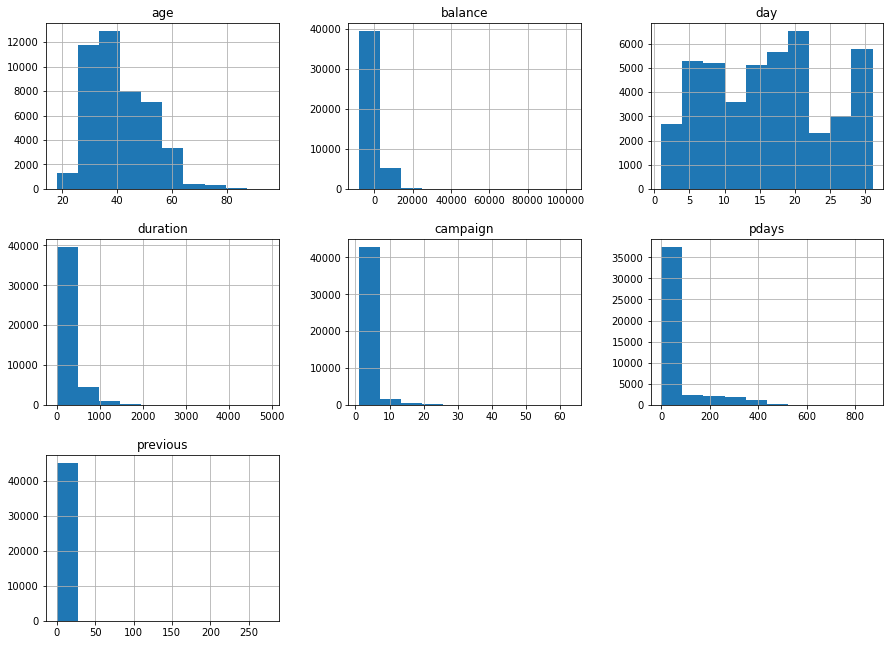

In [17]:
# univariate analysis for continuous variable
plt.rcParams["figure.figsize"] = (15,11)
df.hist();

<b>Observation</b>
- We can see that numerical columns have outliers (especially 'pdays', 'campaign','balance' and 'previous' columns). Possibly there are incorrect values (noisy data), so we should look closer at the data and decide how do we manage the noise.

**Analyzing Balance column**

In [18]:
len(df[df['balance']<0])

3766

In [19]:
len(df[df['balance']<0])*100/df.shape[0]

8.329831235761208

In [20]:
len(df[df['balance']<=0])*100/df.shape[0]

16.102275994780033

<b>Observation</b>
- 3766 customer have -ve balance in their account, which constitutes to 8% of overall data. 'balance' has negative values those are okay as we have loan and default as features for the given dataset, so we can assume that the balance is of a credit account and it can be negative as well
- 16% of customers in this dataset have either zero or negative bank balance

In [21]:
len(df[(df['balance']<=0) & (df['Target']=='yes')])*100/len(df[df['Target']=='yes'])

9.491397239553791

<b>Observation</b>
- 9% of customers who have either zero or -ve balance have accepted for term deposit out of total customers who accepted term deposit!!!

**BOXPLOTs for Numeric columns**

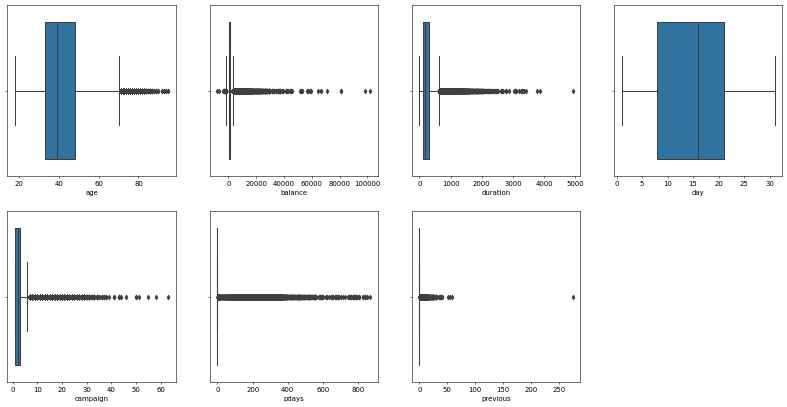

In [22]:
# Check for outliers using boxplot for numerical variables
fig, ax = plt.subplots(figsize=(20,10), dpi=50)
for i in range(0,len(numcols)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x= df[numcols[i]]);

<b>Observation</b>
- Lot of outliers in all these numerical columns except for "day"

<b>Analysis on Marketing related numeric columns</b>

In [23]:
df[['pdays', 'campaign', 'previous','duration']].describe()

,pdays,campaign,previous,duration
count,45211.00,45211.00,45211.00,45211.00
mean,40.20,2.76,0.58,258.16
std,100.13,3.10,2.30,257.53
min,-1.00,1.00,0.00,0.00
25%,-1.00,1.00,0.00,103.00
50%,-1.00,2.00,0.00,180.00
75%,-1.00,3.00,0.00,319.00
max,871.00,63.00,275.00,4918.00


<b>Observation</b>
- 75% of **pdays** (number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)) are not contacted. Hence we can drop this column if needed.
- 75% of **previous** (number of times the client has been contacted before for the last campaign to subscribe term deposit) is zero. Hence we can drop this column if needed.
- As the data information said it will be better to drop the duration column (if needed) since duration is highly correlated in whether a potential client will buy a term deposit. Also, duration is obtained after the call is made to the potential client so if the target client has never received calls this feature is not that useful. The reason why duration is highly correlated with opening a term deposit is because the more the bank talks to a target client the higher the probability the target client will open a term deposit since a higher duration means a higher interest (commitment) from the potential client.
- 75% of **Campaign column** (number of contacts performed during this campaign and for this client) data is 3. Any value greater than 12 **indicates noise. We can either impute them to median value or mean value.**

**KDE plots for Numeric columns**

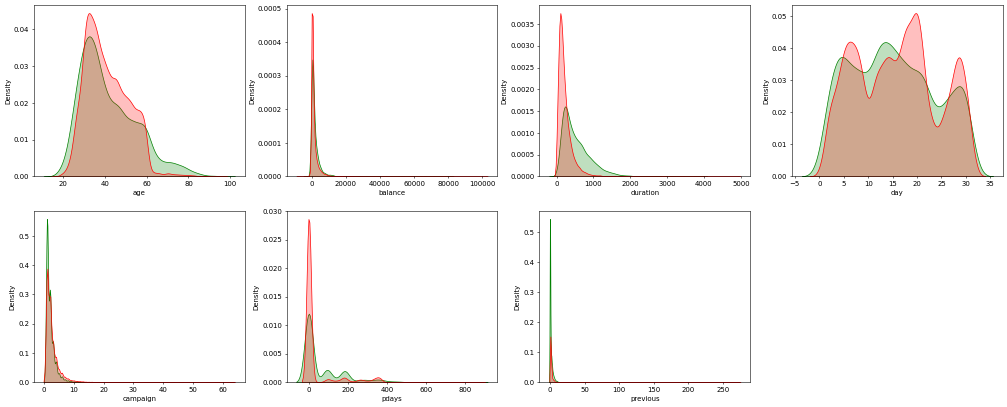

In [24]:
#KDEPlot: Kernel Density Estimate Plots

fig, ax = plt.subplots(figsize=(25,10), dpi=50)
for i in range(0,len(numcols)):
    plt.subplot(2,4,i+1)
    sns.kdeplot(df.loc[(df['Target'] == 'yes'),numcols[i]] , color='g',shade=True)
    sns.kdeplot(df.loc[(df['Target'] == 'no'),numcols[i]] , color='r',shade=True)

<b>Observation</b>
- 60 and above yrs customers are opting for term deposits
- Customers who had longer call duration tends to accept term deposits
- customers who has less no. of previous contacts and less no. of current campaign contacts tends to accept term deposits

<b>Analysis of Target Column</b>

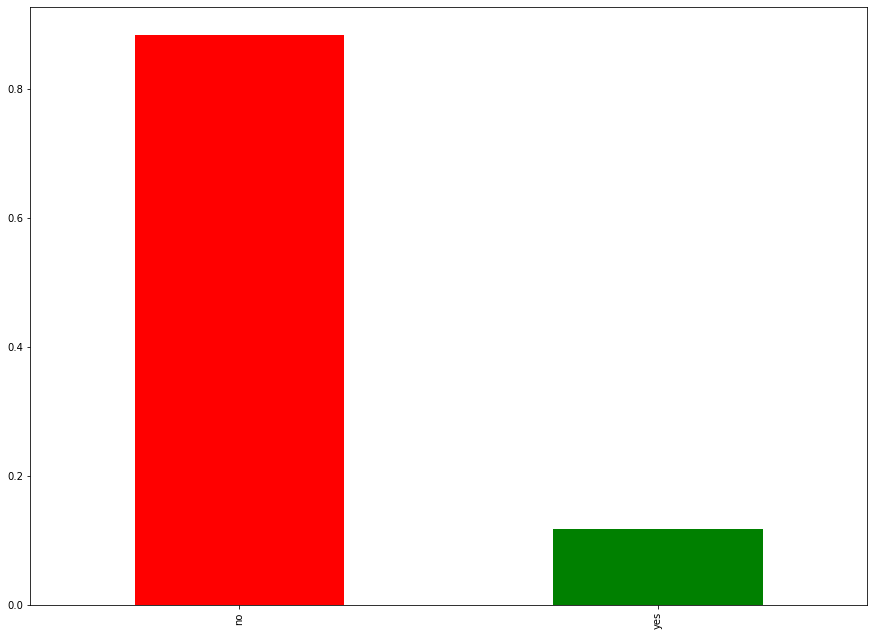

In [25]:
df['Target'].value_counts(normalize=True).plot.bar(color=['red', 'green']); #IMBALANCED class data. This will hit our recall score

<b>Observation</b>
- Target data imbalance. 88% of customers have not opted for term deposit
- Only 11% individuals have term deposit

<b>ANalyzing Numeric columns wrt Target variable</b>

In [26]:
np.round(df.groupby(["Target"]).median() ,1) #Considered median as well because of lot of outliers

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
no,39,417,16,164,2,-1,0
yes,38,733,15,426,2,-1,0


In [27]:
np.round(df.groupby(["Target"]).mean() ,1)

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
no,40.80,1303.70,15.90,221.20,2.80,36.40,0.50
yes,41.70,1804.30,15.20,537.30,2.10,68.70,1.20


**Observations:**
- Customers having good bank balance are generally opting for term deposit
- Customers who are last contacted with greater duration has more chances for accepting term deposit
- Avg duration contacted is 537 seconds for customers who have accepted term deposits
- days passed after the client is last contacted (pdays) is more for customers who accepted term deposits
- Number of days that passed by after the client was last contacted from a previous campaign is higher for people who have subscribed
- Number of contacts performed before this campaign is also higher for customers who subscribe

- **Customer with long term deposit have higher average age, balance account, and were contacted for longer duration compared with customers that don't have long term deposit.**

**Analyzing Categorical Columns**

**Univariate Analysis**

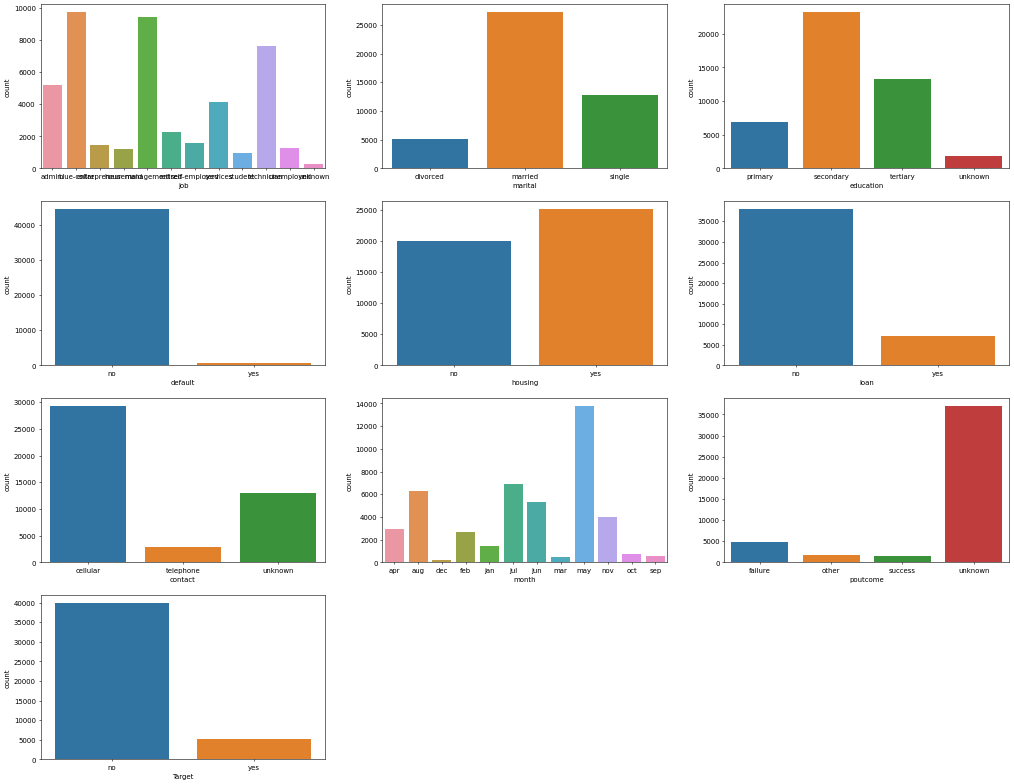

In [28]:
#Analysis of the categorical variables
fig, ax = plt.subplots(figsize=(25,20), dpi=50)
for i in range(0,len(catcols)):
    plt.subplot(4,3,i+1)
    sns.countplot(x= catcols[i],data=df);

<b>Observation</b>
- Married customers are more in the data set
- Majority of the customers in this data have "Secondary" education
- Most of the customers are Non Default in credit. Which is a good thing to bank.
- Customers having Housing loan is more than customers with no house loans
- Less customers have personal loans
- Few customers have contact whose communication type is "unknown" 
- **Customers are mostly contacted during May month and least contacted during Dec and Mar**
- **Majority of data in poutcome is "unknown" which is little bad**
- **Majority of customers in this dataset havent opted for term deposit**

**Bivariate Analysis**

<b>ANalyzing Categorical columns wrt Target variable</b>

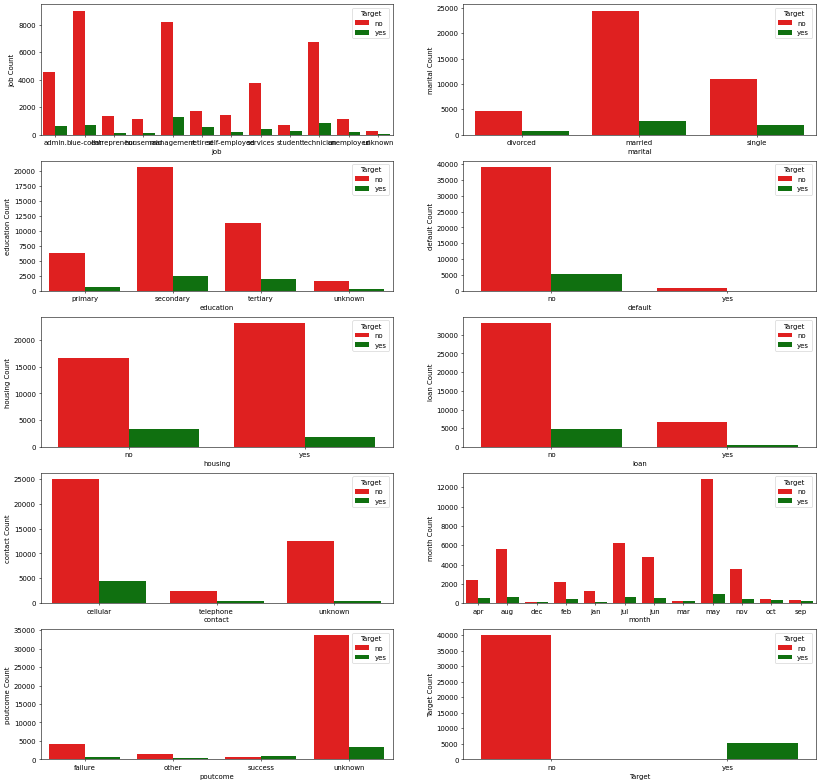

In [29]:
#Bivariate analysis
fig, ax = plt.subplots(figsize=(20,20), dpi=50)
for i in range(0,len(catcols)):
    plt.subplot(5,2,i+1)
    sns.countplot(hue='Target',x= catcols[i],data=df,palette=['red','green']);
    plt.ylabel(catcols[i] + str(' Count'))

<b>Observation</b>
- Majority of the customers are married followed by singles and divorced
- Married customers are less likely to accept term deposits
- Highest customers profession with term deposit: management
- Majority of the customers with term deposit were contacted by cellphone
- Customers are mostly contacted during May month and least contacted during Dec and Mar
- **We can drop poutcome as most of the values are unknown**

**Customer specific demographics analysis wrt Target variable**

In [30]:
# fig = plt.figure(figsize=(20,20))
# ax1 = fig.add_subplot(321)
# ax2 = fig.add_subplot(322)
# ax3 = fig.add_subplot(323)
# ax4 = fig.add_subplot(324)
# ax5 = fig.add_subplot(325)
# ax6 = fig.add_subplot(326)

# g1 = sns.boxplot(x="default", y="balance", hue="Target",
#                     data=df, palette="muted", ax=ax1)

# g1.set_title("Distribution of Default  by Target")

# # ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")

# g2 = sns.boxplot(x="job", y="balance", hue="Target",
#                  data=df, palette="muted", ax=ax2)

# g2.set_xticklabels(df["job"].unique(), rotation=90, rotation_mode="anchor")
# g2.set_title("Distribution of Job  by Target")

# g3 = sns.boxplot(data=df, x="education", y="balance", hue="Target", palette="muted", ax=ax3)
# g3.set_title("Distribution of Education  by Target")

# g4 = sns.boxplot(data=df, x="marital", y="balance", hue="Target", palette="muted", ax=ax4)
# g4.set_title("Distribution of Marital Status by Target")

# g5 = sns.countplot(data=df, x="housing",hue="Target", palette="muted", ax=ax5)
# g5.set_title("Distribution of Housing loan by Target")

# g6 = sns.countplot(data=df, x="loan",hue="Target", palette="muted", ax=ax6)
# g6.set_title("Distribution of Personal  loan by Target")


# plt.show()

**Campaign Related Data**

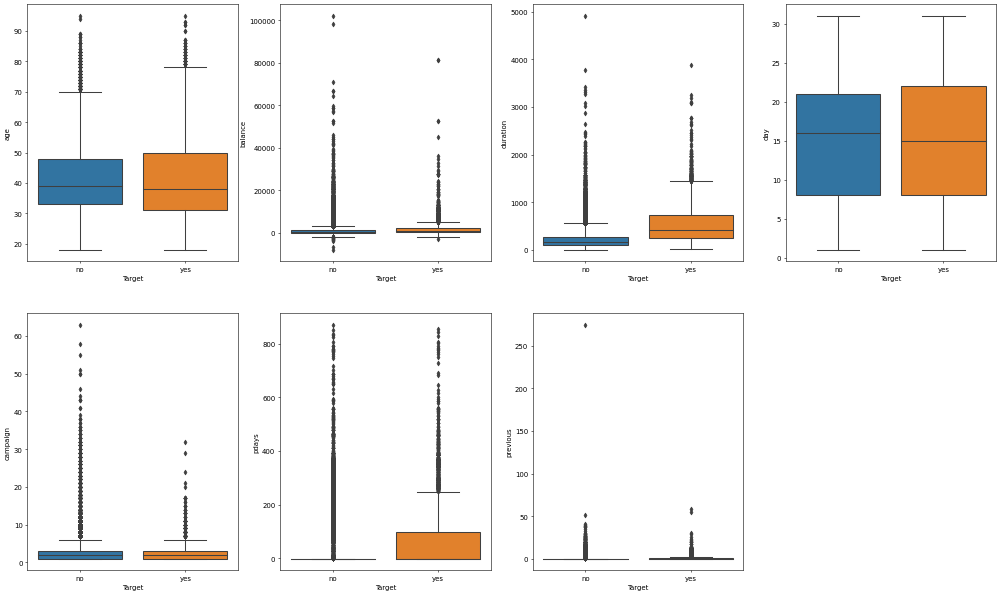

In [31]:
#Bivariate analysis
fig, ax = plt.subplots(figsize=(25,15), dpi=50)
for i in range(0,len(numcols)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x='Target',y= numcols[i],data=df);

**Observation**: 
- Campaign values are higher for people saying no to term deposits i.e. people saying yes to term deposits have less number of contact during the campaign -- **the more we call the same potential client, the less likely he or she will open a term deposit**
- Duration of contact is high for people who accepted term deposit
- No. of days passed is more for people who accepted term deposits

In [32]:
# fig = plt.figure(figsize=(15,5))
# ax1 = fig.add_subplot(121)
# ax2 = fig.add_subplot(122)


# g1 = sns.violinplot(x="contact", y="balance", hue="Target",
#                     data=df, palette="muted", ax=ax1)

# g1.set_title("Distribution of contact by Target")

# # ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")

# g2 = sns.violinplot(x="month", y="balance", hue="Target",
#                  data=df, palette="muted", ax=ax2)

# g2.set_xticklabels(df["month"].unique(), rotation=90)
# g2.set_title("Distribution of month  by Target")


# plt.show()

In [33]:
pd.crosstab(df['job'], df['Target'], normalize='index').sort_values(by='yes',ascending=False )*100

Target,no,yes
job,,
student,71.32,28.68
retired,77.21,22.79
unemployed,84.50,15.50
management,86.24,13.76
admin.,87.80,12.20
self-employed,88.16,11.84
unknown,88.19,11.81
technician,88.94,11.06
services,91.12,8.88


In [34]:
pd.crosstab(df['marital'], df['Target'], normalize='index').sort_values(by='yes',ascending=False )*100

Target,no,yes
marital,,
single,85.05,14.95
divorced,88.05,11.95
married,89.88,10.12


In [35]:
pd.crosstab(df['education'], df['Target'], normalize='index').sort_values(by='yes',ascending=False )*100

Target,no,yes
education,,
tertiary,84.99,15.01
unknown,86.43,13.57
secondary,89.44,10.56
primary,91.37,8.63


In [36]:
pd.crosstab(df['default'], df['Target'], normalize='index').sort_values(by='yes',ascending=False )*100

Target,no,yes
default,,
no,88.20,11.80
yes,93.62,6.38


In [37]:
pd.crosstab(df['housing'], df['Target'], normalize='index').sort_values(by='yes',ascending=False )*100

Target,no,yes
housing,,
no,83.30,16.70
yes,92.30,7.70


In [38]:
pd.crosstab(df['loan'], df['Target'], normalize='index').sort_values(by='yes',ascending=False )*100

Target,no,yes
loan,,
no,87.34,12.66
yes,93.32,6.68


In [39]:
pd.crosstab(df['month'], df['Target'], normalize='index').sort_values(by='yes',ascending=False )*100

Target,no,yes
month,,
mar,48.01,51.99
dec,53.27,46.73
sep,53.54,46.46
oct,56.23,43.77
apr,80.32,19.68
feb,83.35,16.65
aug,88.99,11.01
jun,89.78,10.22
nov,89.85,10.15


**Observations:**
- **Student and Retired customers are more likely to accept Term deposits**
- **Singles are bit more likely to accept term deposits** than other marital groups
- **Tertiary Education groups are bit more likely to accept term deposits** than other Ed. groups
- **No Credit defaults are likely to accept Term deposits**
- **No Housing and personal loans are more likely to accept term deposits**
- Month of highest level of marketing activity was the **month of May**

In [40]:
# # np.round(df.groupby(["job"])['balance'].median() ,1)


# grouped_multiple = np.round(df.groupby(['job', 'Target']).agg({'balance': ['mean', 'min', 'max','median']}),2)
# grouped_multiple.columns = ['bal_mean', 'bal_min', 'bal_max','bal_median']
# grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple.style.highlight_max(color = 'lightgreen', axis = 0)

<b>Observation</b>
- Retired have more bank balance and more chance to accept term deposits

In [41]:
dfcopy = df.copy()

In [42]:
catcols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'Target']

In [43]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for cols in catcols:
    df[cols] = le.fit_transform(df[cols])

<b>Correlation Plot</b>

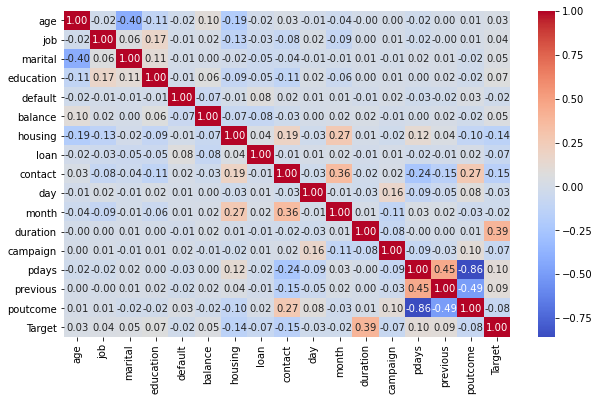

In [44]:
plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt=".2f");

<b>Observation</b>
- Duration and Target are slightly +ve correlated (0.39)
- pdays and poutcome are -ve correleated (-0.86)
- poutcome and previous are -ve correleated (-0.49)
- previous and pdays are +ve correlated (0.45)
- Marital and age are -ve correlated (-0.40)

In [45]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  Target     45211 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


### Feature Engineering

In [47]:
# # coverting "yes" by 1 and "no" by 0 for further analysis
# cat_bool =['default','housing','loan','Target']
# for cat in df[cat_bool]:
#     df[cat]=df[cat].apply(lambda x: 1 if x=='yes' else 0)
#     df[cat]=df[cat].astype('uint8')

In [48]:
# df = df.drop(['poutcome','duration','pdays','previous'],axis=1)

In [49]:
# df['balance'].describe()

In [50]:

# #Binning balance

# bin_edges=[-8020,0,72,448,1428,102128]
# # first value is min value -1 of the column and last value is max +1  of the column, so that all values are included
# # you can choose middle value on your own or select 25th, 50th and 75th percentile value
# bin_names=['very low','low','medium','high','very high']
# # Names of each bin or category
# df['balance'] = pd.cut(df['balance'],bin_edges,labels=bin_names)

In [51]:
df['campaign'].describe()

count   45211.00
mean        2.76
std         3.10
min         1.00
25%         1.00
50%         2.00
75%         3.00
max        63.00
Name: campaign, dtype: float64

**Imputing Campaign noise data with 99 percentile**

In [52]:
Quantile_99 = df['campaign'].quantile(.99)
Quantile_99

16.0

In [53]:
df.loc[df.campaign > Quantile_99, "campaign"] = Quantile_99

In [54]:
df[df.campaign > Quantile_99]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


In [55]:
# #Binning Campaign

# bin_edges=[0,2,3,4,564]
# # first value is min value -1 of the column and last value is max +1  of the column, so that all values are included
# # you can choose middle value on your own or select 25th, 50th and 75th percentile value
# bin_names=['<=2','3', '4','>=4']
# # Names of each bin or category
# df['campaign'] = pd.cut(df['campaign'],bin_edges,labels=bin_names)

In [56]:
# bin_edges=[0,30,40,50,60,100]
# # first value is min value -1 of the column and last value is max +1  of the column, so that all values are included
# # you can choose middle value on your own or select 25th, 50th and 75th percentile value
# bin_names=['=30','30-40','40-50','50-60','>60']
# # Names of each bin or category
# df['age'] = pd.cut(df['age'],bin_edges,labels=bin_names)

In [57]:
# bin_edges=[0,7,14,21,28,32]
# # first value is min value -1 of the column and last value is max +1  of the column, so that all values are included
# # you can choose middle value on your own or select 25th, 50th and 75th percentile value
# bin_names=['week1','week2','week3','week4','week5']
# # Names of each bin or category
# df['day'] = pd.cut(df['day'],bin_edges,labels=bin_names)

In [58]:
# def func(num):
#     if num=='<=2':
#         return 1
#     elif num=='3':
#         return 2
#     elif num=='>=4':
#         return 3
#     else:
#         return 4
    
# df['campaign']= df['campaign'].apply(func)

In [59]:
# df['previous'] = df['previous'].apply(lambda x: 0 if x<=0 else 1)

In [60]:
# df['job'].value_counts()

In [61]:
# #Optimize the number of classes in job
# df['job']=np.where(df['job']=='blue-collar','worker',df['job'])
# df['job']=np.where(df['job']=='technician','worker',df['job'])
# df['job']=np.where(df['job']=='housemaid','worker',df['job'])
# df['job']=np.where(df['job']=='management','managerial',df['job'])
# df['job']=np.where(df['job']=='services','managerial',df['job'])
# df['job']=np.where(df['job']=='admin.','managerial',df['job'])
# df['job']=np.where(df['job']=='entrepreneur','managerial',df['job'])
# df['job']=np.where(df['job']=='retired','nonjob',df['job'])
# df['job']=np.where(df['job']=='student','nonjob',df['job'])
# df['job']=np.where(df['job']=='unemployed','nonjob',df['job'])

# df['job'].unique()

In [62]:
# replaceStruct = {
#                 "education":     {"primary": 1, "secondary": 2 ,"tertiary": 3 ,"unknown":0},
#                 "contact": {"unknown":0,"telephone":1,"cellular":2},
#                 "job":     {"nonjob": 1, "worker": 2, "self-employed": 3, "managerial": 4,"unknown":0},
# #                 "poutcome":{'other':0, 'failure':0, 'success':1,'unknown':0},
#                 "marital": {"married":1,"divorced":2,"single":3},
#                 "balance":     {"very low": 0, "low": 1 ,"medium": 2 ,"high":3,"very high":4},
#                 "age":{'=30':1,'30-40':2,'40-50':3,'50-60':4,'>60':5},
#                 "day":{'week1':1,'week2':2,'week3':3,'week4':4,'week5':5}
#                     }

In [63]:
# df=df.replace(replaceStruct)

In [64]:
# df['pdays'] = np.log1p(df['pdays'])

In [65]:
# #converting object type to categorical
# categorical = ['education','contact','job','marital','Target','day','month','default','housing','loan']
# for feature in categorical: # Loop through all columns in the dataframe
# #     if df[feature].dtype == 'object': # Only apply for columns with categorical strings
#     df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
        
# df.info()

In [66]:
df['pdays'] = df['pdays'].apply(lambda x:0 if x<0 else x)

In [67]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [68]:
df = pd.get_dummies(df, columns=['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month'])

In [69]:
df.shape

(45211, 49)

In [71]:
X=pd.DataFrame()
y=pd.DataFrame()
X = df.drop('Target',axis=1)
y=df['Target']

from sklearn.model_selection import train_test_split

stratified_train_X, stratified_test_X, stratified_train_y, stratified_test_y = train_test_split(X, y, test_size=0.30,stratify=y, random_state=random_state)
print('x train data {}'.format(stratified_train_X.shape))
print('y train data {}'.format(stratified_train_y.shape))
print('x test data  {}'.format(stratified_test_X.shape))
print('y test data  {}'.format(stratified_test_y.shape))

x train data (31647, 48)
y train data (31647,)
x test data  (13564, 48)
y test data  (13564,)


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          45211 non-null  int64  
 1   balance      45211 non-null  int64  
 2   day          45211 non-null  int64  
 3   duration     45211 non-null  int64  
 4   campaign     45211 non-null  float64
 5   pdays        45211 non-null  int64  
 6   previous     45211 non-null  int64  
 7   poutcome     45211 non-null  int32  
 8   Target       45211 non-null  int32  
 9   job_0        45211 non-null  uint8  
 10  job_1        45211 non-null  uint8  
 11  job_2        45211 non-null  uint8  
 12  job_3        45211 non-null  uint8  
 13  job_4        45211 non-null  uint8  
 14  job_5        45211 non-null  uint8  
 15  job_6        45211 non-null  uint8  
 16  job_7        45211 non-null  uint8  
 17  job_8        45211 non-null  uint8  
 18  job_9        45211 non-null  uint8  
 19  job_

In [73]:
from sklearn.preprocessing import StandardScaler

cols_stnd = ['age', 'balance', 'day', 'campaign','duration','pdays','previous', 'poutcome']
scaler = StandardScaler()
stratified_train_X.loc[:,cols_stnd] = scaler.fit_transform(stratified_train_X[cols_stnd])

# normalize test set
stratified_test_X.loc[:,cols_stnd] = scaler.transform(stratified_test_X[cols_stnd])

C:\Users\profe\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\profe\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [74]:
# Oversampling
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = random_state, sampling_strategy = 'minority')
stratified_train_X, stratified_train_y = sm.fit_sample(stratified_train_X, stratified_train_y)

In [75]:
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler()
# stratified_train_X, stratified_train_y = ros.fit_sample(stratified_train_X, stratified_train_y)

In [76]:
print('x train data {}'.format(stratified_train_X.shape))
print('y train data {}'.format(stratified_train_y.shape))
print('x test data  {}'.format(stratified_test_X.shape))
print('y test data  {}'.format(stratified_test_y.shape))

x train data (55890, 48)
y train data (55890,)
x test data  (13564, 48)
y test data  (13564,)


In [77]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score # Performance measure – Accuracy
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import preprocessing

train_score,test_score,tn, fp, fn, tp  = 0,0,0,0,0,0
Recall,Specificity,Presicion,Accu,f1,logit_roc_auc = 0,0,0,0,0,0
#model_coeff = []

def model_performance(model,model_name, X_train, y_train, X_test, y_test):
    global train_score,test_score,tn, fp, fn, tp, Recall,Specificity,Presicion,Accu,f1,logit_roc_auc
    
    ml_train = model.fit(X_train, y_train)
    #model_coeff = ml_train.coef_
    train_score = round(ml_train.score(X_train, y_train),4)
    test_score = round(ml_train.score(X_test, y_test),4)
    
    # prediction
    predict = model.predict(X_test)
    
    #Feature Importance
    if ((model_name == 'Decision Tree') or (model_name == "Regularized Decision Tree") 
    or (model_name == "Random Forest Classifier") or (model_name == "AdaBoost Classifier") 
    or (model_name == "XGBoost Classifier")
    or (model_name == "Gradient Boosting Classifier")) :
        print("Feature Importance")
        print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by='Imp',ascending=False))
    elif (model_name == 'Logistic Regression'):
        coef_df = pd.DataFrame(model.coef_)
        coef_df['intercept'] = model.intercept_
        print("\n")
        print(coef_df)
    
    #score the model
    print('\n')
    print('Model Train Score :',train_score)
    print('Model Test Score :',test_score)
    print('\n')
    
    # confusion metrics
    plt.figure(figsize = (4,3))
    cm=confusion_matrix(y_test, predict)
    sns.heatmap(cm, annot=True,  fmt='2d',xticklabels = [0,1] , yticklabels = [0,1] ,cmap=plt.cm.copper)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    print('\n')
    
    #Metric data
    tn, fp, fn, tp = metrics.confusion_matrix(y_test,predict).ravel()
    
    # classification report
    Recall = round(tp/float(tp+fn),4)
    Specificity = round(tn/float(tn+fp),4)
    Presicion = round(tp/float(tp+fp),4)
    
    f1 = round(2*Presicion*Recall/(Presicion+Recall),4)
    print('\n')
    print(classification_report(y_test, predict))
    print('\n')
    
     # ROC Curve
    plt.rcParams["figure.figsize"] = (5,3)
    logit_roc_auc = round(roc_auc_score(y_test, model.predict(X_test)),4)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label=model_name +' (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig(model_name)
    plt.show()
    
    # output
    return(train_score,test_score,tn, fp, fn, tp, Recall,Specificity,Presicion,Accu,f1,logit_roc_auc)
    

#### Model Build - Logistic Regression - Hyper Parameters Optimizaton

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [79]:
clas_LR = LogisticRegression()
params_LR={
    'solver'   : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty'  :['l1', 'l2', 'elasticnet', 'none'],
    'max_iter' :[100, 1000, 2000, 3000, 4000]
}
random_searchLR=RandomizedSearchCV(clas_LR,param_distributions=params_LR,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

In [80]:
random_searchLR.fit(stratified_train_X, stratified_train_y);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   35.6s remaining:   11.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.8min finished


In [81]:
lr_bp=random_searchLR.best_params_
lr_bp

{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 1000}



      0     1    2    3     4    5    6    7     8     9  ...    39    40  \
0 -0.02 -0.02 0.03 1.35 -0.39 0.21 0.18 0.29 -4.51 -4.60  ... -4.91 -6.27   

     41    42    43    44    45    46    47  intercept  
0 -5.89 -4.48 -3.27 -5.14 -5.84 -3.89 -3.89      32.75  

[1 rows x 49 columns]


Model Train Score : 0.9088
Model Test Score : 0.8916




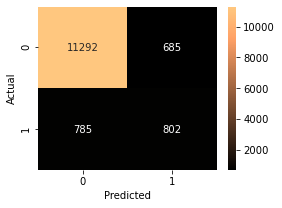





              precision    recall  f1-score   support

           0       0.94      0.94      0.94     11977
           1       0.54      0.51      0.52      1587

    accuracy                           0.89     13564
   macro avg       0.74      0.72      0.73     13564
weighted avg       0.89      0.89      0.89     13564





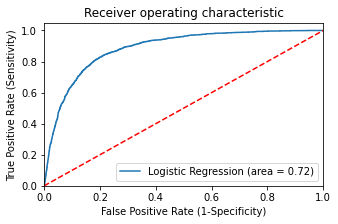

(0.9088,
 0.8916,
 11292,
 685,
 785,
 802,
 0.5054,
 0.9428,
 0.5393,
 0,
 0.5218,
 0.7241)

In [82]:
lr = LogisticRegression(fit_intercept=True,solver= lr_bp['solver'], penalty= lr_bp['penalty'], max_iter= lr_bp['max_iter'], random_state=random_state)
model = lr

model_performance(model,"Logistic Regression",stratified_train_X, stratified_train_y, stratified_test_X, stratified_test_y)

In [83]:
# Storing data
train_score_LR, test_score_LR,tnLR, fpLR, fnLR, tpLR  = train_score,test_score,tn, fp, fn, tp
Recall_LR,Specificity_LR,Precision_LR,Acc_LR,f1_LR,roc_auc_LR = Recall,Specificity,Presicion,Accu,f1,logit_roc_auc

#### Model Building - Decision Tree

Feature Importance
             Imp
duration    0.34
contact_2   0.08
day         0.07
campaign    0.07
housing_1   0.06
balance     0.06
age         0.05
pdays       0.03
previous    0.03
month_1     0.02
month_5     0.02
poutcome    0.02
month_9     0.02
month_8     0.01
month_3     0.01
month_0     0.01
month_4     0.01
loan_1      0.01
month_10    0.01
housing_0   0.01
education_2 0.00
education_1 0.00
marital_1   0.00
job_9       0.00
education_0 0.00
job_1       0.00
job_4       0.00
month_6     0.00
marital_0   0.00
marital_2   0.00
job_0       0.00
contact_1   0.00
contact_0   0.00
education_3 0.00
month_7     0.00
job_7       0.00
loan_0      0.00
job_2       0.00
job_6       0.00
job_10      0.00
job_3       0.00
default_0   0.00
month_11    0.00
job_8       0.00
job_5       0.00
month_2     0.00
job_11      0.00
default_1   0.00


Model Train Score : 1.0
Model Test Score : 0.866




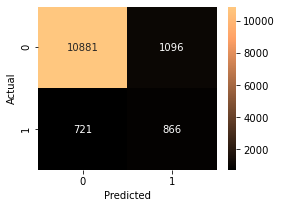





              precision    recall  f1-score   support

           0       0.94      0.91      0.92     11977
           1       0.44      0.55      0.49      1587

    accuracy                           0.87     13564
   macro avg       0.69      0.73      0.71     13564
weighted avg       0.88      0.87      0.87     13564





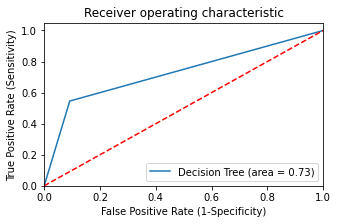

(1.0, 0.866, 10881, 1096, 721, 866, 0.5457, 0.9085, 0.4414, 0, 0.488, 0.7271)

In [84]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=random_state)
# calling score_confmetrics funtion
model = dTree
model_performance(model,"Decision Tree",stratified_train_X,stratified_train_y, stratified_test_X, stratified_test_y)

In [85]:
# Storing data
train_score_DT, test_score_DT,tnDT, fpDT, fnDT, tpDT  = train_score,test_score,tn, fp, fn, tp
Recall_DT,Specificity_DT,Precision_DT,Acc_DT,f1_DT,roc_auc_DT = Recall,Specificity,Presicion,Accu,f1,logit_roc_auc

#### Model Building - Decision Tree Classifier - Hyper Parameters Optimizaton

In [86]:
reg_dt = DecisionTreeClassifier()
#
params_DTr={
    'criterion'        :['gini','entropy'],
    'max_depth'        :[ 1, 3, 5, 7,10,13],
    'min_samples_split':[ 2, 3, 5, 7, 10],
    'min_samples_leaf' :[ 1, 2, 3, 5, 7, 10],
}
#
random_searchDT=RandomizedSearchCV(reg_dt,param_distributions=params_DTr,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

In [87]:
random_searchDT.fit(stratified_train_X, stratified_train_y);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    0.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.2s finished


In [88]:
dtr_bp = random_searchDT.best_params_
dtr_bp

{'min_samples_split': 7,
 'min_samples_leaf': 5,
 'max_depth': 5,
 'criterion': 'gini'}

Feature Importance
             Imp
duration    0.61
contact_2   0.15
housing_1   0.11
balance     0.03
pdays       0.03
previous    0.02
campaign    0.02
month_8     0.01
age         0.01
poutcome    0.01
month_10    0.00
loan_1      0.00
education_3 0.00
month_7     0.00
day         0.00
month_3     0.00
loan_0      0.00
contact_0   0.00
contact_1   0.00
month_4     0.00
month_0     0.00
month_1     0.00
month_2     0.00
default_1   0.00
month_5     0.00
month_6     0.00
month_9     0.00
housing_0   0.00
education_1 0.00
default_0   0.00
job_7       0.00
job_0       0.00
job_1       0.00
job_2       0.00
job_3       0.00
job_4       0.00
job_5       0.00
job_6       0.00
job_8       0.00
education_2 0.00
job_9       0.00
job_10      0.00
job_11      0.00
marital_0   0.00
marital_1   0.00
marital_2   0.00
education_0 0.00
month_11    0.00


Model Train Score : 0.8285
Model Test Score : 0.7906




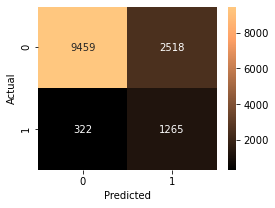





              precision    recall  f1-score   support

           0       0.97      0.79      0.87     11977
           1       0.33      0.80      0.47      1587

    accuracy                           0.79     13564
   macro avg       0.65      0.79      0.67     13564
weighted avg       0.89      0.79      0.82     13564





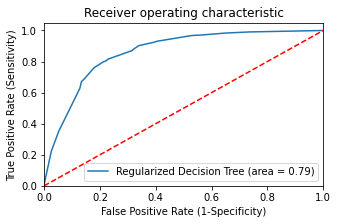

(0.8285,
 0.7906,
 9459,
 2518,
 322,
 1265,
 0.7971,
 0.7898,
 0.3344,
 0,
 0.4711,
 0.7934)

In [89]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeClassifier(criterion = dtr_bp['criterion'], max_depth = dtr_bp['max_depth'],
                                      random_state=random_state,min_samples_leaf=dtr_bp['min_samples_leaf'],
                                      min_samples_split=dtr_bp['min_samples_split'])
model = reg_dt_model
model_performance(model,"Regularized Decision Tree",stratified_train_X,stratified_train_y, stratified_test_X, stratified_test_y)

In [90]:
# Storing data
train_score_DTR, test_score_DTR,tnDTR, fpDTR, fnDTR, tpDTR  = train_score,test_score,tn, fp, fn, tp
Recall_DTR,Specificity_DTR,Precision_DTR,Acc_DTR,f1_DTR,roc_auc_DTR = Recall,Specificity,Presicion,Accu,f1,logit_roc_auc

#### Visualizing Pruned or Regularized Decision Tree

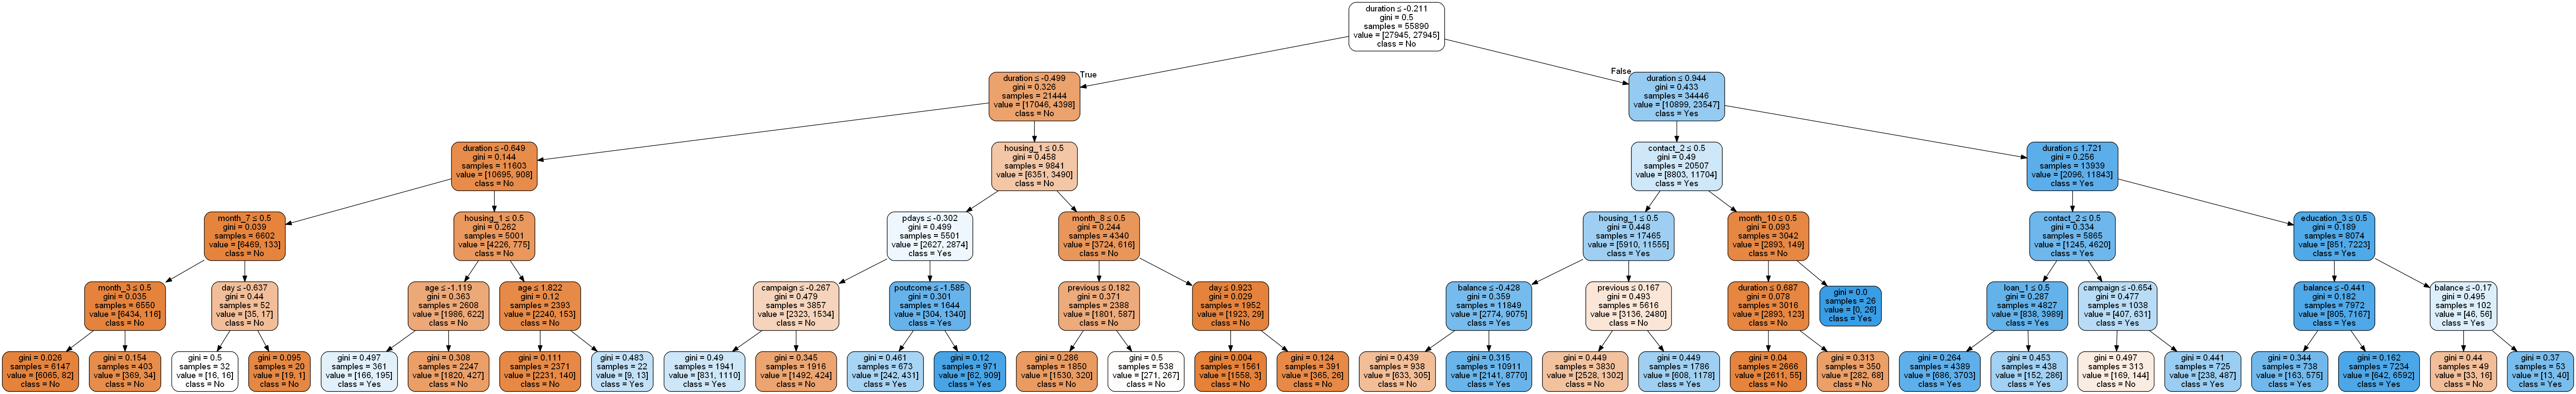

In [91]:
from sklearn.tree import export_graphviz
import io
from io import StringIO
from IPython.display import Image
import pydotplus
import graphviz

# xvar = stratified_train_X
feature_cols = stratified_train_X.columns
train_char_label = ['No', 'Yes']

tar = StringIO()
export_graphviz(reg_dt_model, out_file=tar,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=train_char_label)
graph_bt = pydotplus.graph_from_dot_data(tar.getvalue())  
graph_bt.write_png('termdepositDTR.png')
Image(graph_bt.create_png())

#### Model Building - Bagging Classifier - Hyper Parameters Optimizaton

In [92]:
from sklearn.ensemble import BaggingClassifier

In [93]:
Bagc = BaggingClassifier()
#
params_B={
    'n_estimators' :[10, 25, 50, 75, 100,750,1000],
    'max_samples'  :[0.01, 0.1, 0.5, 0.75, 1.0],
    'max_features'  :[0.01, 0.1, 0.5, 0.75, 1.0]
}
#
random_searchB=RandomizedSearchCV(Bagc,param_distributions=params_B,
                                  n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

In [94]:
random_searchB.fit(stratified_train_X, stratified_train_y);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  1.7min remaining:   33.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.4min finished


In [95]:
bgc_bp = random_searchB.best_params_
bgc_bp

{'n_estimators': 1000, 'max_samples': 0.75, 'max_features': 0.5}



Model Train Score : 0.9999
Model Test Score : 0.9028




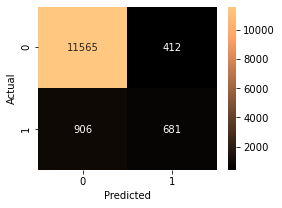





              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11977
           1       0.62      0.43      0.51      1587

    accuracy                           0.90     13564
   macro avg       0.78      0.70      0.73     13564
weighted avg       0.89      0.90      0.89     13564





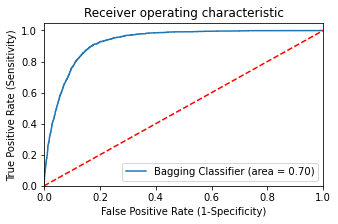

(0.9999,
 0.9028,
 11565,
 412,
 906,
 681,
 0.4291,
 0.9656,
 0.6231,
 0,
 0.5082,
 0.6974)

In [96]:
# Bagging Classifier
bgc = BaggingClassifier(n_estimators=bgc_bp['n_estimators'], max_samples= bgc_bp['max_samples'],max_features= bgc_bp['max_features'], random_state=random_state)
model = bgc
model_performance(model,"Bagging Classifier",stratified_train_X,stratified_train_y, stratified_test_X, stratified_test_y)

In [97]:
# Storing data
train_score_bgc, test_score_bgc,tnbgc, fpbgc, fnbgc, tpbgc  = train_score,test_score,tn, fp, fn, tp
Recall_bgc,Specificity_bgc,Precision_bgc,Acc_bgc,f1_bgc,roc_auc_bgc = Recall,Specificity,Presicion,Accu,f1,logit_roc_auc

#### Model Building - Random Forest Classifier - Hyper Parameters Optimizaton

In [98]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
#
params_RF={
    'criterion'        :['gini','entropy'],
    'n_estimators' :[100, 250, 500, 750, 1000],
    'max_depth'        :[ 1, 3, 5, 7, 10,15,20,40],
    'min_samples_split' :[2, 3, 5, 7, 10, 15],
    'min_samples_leaf' :[1, 2, 3, 5, 7, 10, 15]
}
#
random_searchRF=RandomizedSearchCV(RF,param_distributions=params_RF,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

In [99]:
random_searchRF.fit(stratified_train_X, stratified_train_y);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  2.4min remaining:   44.9s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.0min finished


In [100]:
rfc_bp=random_searchRF.best_params_
rfc_bp

{'n_estimators': 750,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_depth': 40,
 'criterion': 'gini'}

Feature Importance
             Imp
duration    0.37
campaign    0.08
balance     0.05
contact_2   0.05
day         0.04
housing_1   0.04
age         0.04
poutcome    0.03
pdays       0.03
previous    0.03
month_8     0.02
month_1     0.02
month_5     0.02
housing_0   0.02
loan_1      0.02
month_9     0.01
contact_0   0.01
marital_1   0.01
job_1       0.01
month_4     0.01
month_0     0.01
month_3     0.01
loan_0      0.01
month_6     0.01
education_1 0.01
education_0 0.01
marital_2   0.01
job_9       0.01
contact_1   0.00
education_2 0.00
marital_0   0.00
month_10    0.00
job_4       0.00
job_7       0.00
job_0       0.00
job_3       0.00
month_7     0.00
job_6       0.00
job_5       0.00
education_3 0.00
job_2       0.00
job_10      0.00
job_8       0.00
month_11    0.00
default_0   0.00
default_1   0.00
month_2     0.00
job_11      0.00


Model Train Score : 0.9609
Model Test Score : 0.8876




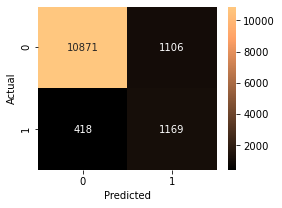





              precision    recall  f1-score   support

           0       0.96      0.91      0.93     11977
           1       0.51      0.74      0.61      1587

    accuracy                           0.89     13564
   macro avg       0.74      0.82      0.77     13564
weighted avg       0.91      0.89      0.90     13564





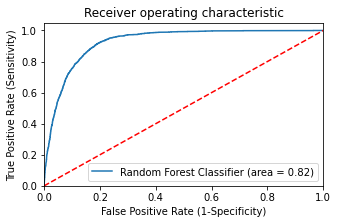

(0.9609,
 0.8876,
 10871,
 1106,
 418,
 1169,
 0.7366,
 0.9077,
 0.5138,
 0,
 0.6054,
 0.8221)

In [101]:
rfc = RandomForestClassifier(criterion = rfc_bp['criterion'], n_estimators = rfc_bp['n_estimators'], max_depth=rfc_bp['max_depth'], 
                              min_samples_split=rfc_bp['min_samples_split'], min_samples_leaf=rfc_bp['min_samples_leaf'],random_state=random_state)
model = rfc
model_performance(model,"Random Forest Classifier",stratified_train_X,stratified_train_y, stratified_test_X, stratified_test_y)

In [102]:
#storing data
train_score_rfc, test_score_rfc,tnrfc, fprfc, fnrfc, tprfc  = train_score,test_score,tn, fp, fn, tp
Recall_rfc,Specificity_rfc,Precision_rfc,Acc_rfc,f1_rfc,roc_auc_rfc = Recall,Specificity,Presicion,Accu,f1,logit_roc_auc

#### Model Building - AdaBoost Classifier - Hyper Parameters Optimizaton

In [103]:
from sklearn.ensemble import AdaBoostClassifier

In [104]:
clas_AB = AdaBoostClassifier()
#
params_AB={
    'n_estimators' :[50, 100, 150, 200, 250],
    'learning_rate'  :[0.1, 0.3, 0.5, 0.75],
}
#
random_searchAB=RandomizedSearchCV(clas_AB,param_distributions=params_AB,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

In [105]:
random_searchAB.fit(stratified_train_X, stratified_train_y);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  1.4min remaining:   27.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.6min finished


In [106]:
abc_bp = random_searchAB.best_params_
abc_bp

{'n_estimators': 250, 'learning_rate': 0.75}

Feature Importance
             Imp
campaign    0.29
duration    0.06
day         0.03
month_8     0.03
poutcome    0.03
month_5     0.03
marital_1   0.03
month_1     0.03
marital_2   0.03
education_1 0.02
loan_0      0.02
loan_1      0.02
month_0     0.02
marital_0   0.02
job_4       0.02
month_9     0.02
month_3     0.02
month_6     0.02
education_2 0.02
education_0 0.02
month_4     0.02
age         0.02
job_9       0.02
pdays       0.02
job_0       0.02
job_1       0.02
balance     0.01
job_7       0.01
job_5       0.01
contact_2   0.01
job_6       0.01
month_10    0.01
previous    0.01
job_2       0.01
job_3       0.01
month_2     0.01
month_11    0.01
job_10      0.01
housing_1   0.01
education_3 0.01
contact_1   0.00
job_8       0.00
housing_0   0.00
job_11      0.00
contact_0   0.00
month_7     0.00
default_1   0.00
default_0   0.00


Model Train Score : 0.9234
Model Test Score : 0.8896




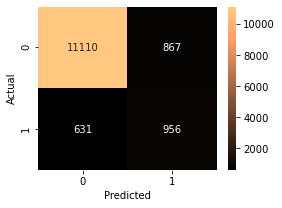





              precision    recall  f1-score   support

           0       0.95      0.93      0.94     11977
           1       0.52      0.60      0.56      1587

    accuracy                           0.89     13564
   macro avg       0.74      0.77      0.75     13564
weighted avg       0.90      0.89      0.89     13564





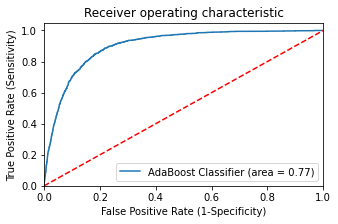

(0.9234,
 0.8896,
 11110,
 867,
 631,
 956,
 0.6024,
 0.9276,
 0.5244,
 0,
 0.5607,
 0.765)

In [107]:
# Regularizing the Decision tree classifier and fitting the model
abc = AdaBoostClassifier(n_estimators=abc_bp['n_estimators'], learning_rate=abc_bp['learning_rate'], random_state=random_state)
model = abc
model_performance(model,"AdaBoost Classifier",stratified_train_X,stratified_train_y, stratified_test_X, stratified_test_y)

In [108]:
#storing data
train_score_abc, test_score_abc,tnabc, fpabc, fnabc, tpabc  = train_score,test_score,tn, fp, fn, tp
Recall_abc,Specificity_abc,Precision_abc,Acc_abc,f1_abc,roc_auc_abc = Recall,Specificity,Presicion,Accu,f1,logit_roc_auc

#### Model Building - Gradient Boosting Classifier - Hyper Parameters Optimizaton

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

In [110]:
clas_GB = GradientBoostingClassifier()
#
params_GB={
    'n_estimators' :[100, 150, 200, 250],
    'learning_rate'  :[0.01, 0.05, 0.075, 0.1,0.3,0.5,0.75],
    'max_depth'  :[1,2,3],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf' :[2, 3, 5, 7, 10],
}
#
random_searchGB=RandomizedSearchCV(clas_GB,param_distributions=params_GB,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

In [111]:
random_searchGB.fit(stratified_train_X, stratified_train_y);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  2.1min remaining:   39.7s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.3min finished


In [112]:
gbc_bp = random_searchGB.best_params_
gbc_bp

{'n_estimators': 250,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 3,
 'learning_rate': 0.3}

Feature Importance
             Imp
duration    0.42
campaign    0.13
contact_2   0.08
housing_1   0.05
poutcome    0.05
day         0.03
balance     0.03
month_5     0.02
age         0.02
month_8     0.02
month_1     0.02
pdays       0.01
month_9     0.01
previous    0.01
month_4     0.01
month_0     0.01
marital_2   0.01
job_1       0.01
loan_1      0.01
month_3     0.01
housing_0   0.00
marital_1   0.00
month_10    0.00
loan_0      0.00
education_2 0.00
marital_0   0.00
education_1 0.00
job_9       0.00
education_0 0.00
job_4       0.00
month_7     0.00
job_3       0.00
job_7       0.00
education_3 0.00
month_6     0.00
job_6       0.00
job_0       0.00
job_2       0.00
job_10      0.00
contact_1   0.00
job_5       0.00
month_11    0.00
month_2     0.00
job_8       0.00
contact_0   0.00
job_11      0.00
default_0   0.00
default_1   0.00


Model Train Score : 0.9554
Model Test Score : 0.9036




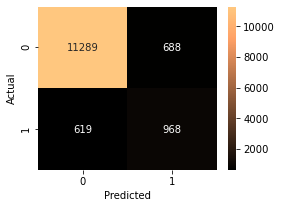





              precision    recall  f1-score   support

           0       0.95      0.94      0.95     11977
           1       0.58      0.61      0.60      1587

    accuracy                           0.90     13564
   macro avg       0.77      0.78      0.77     13564
weighted avg       0.91      0.90      0.90     13564





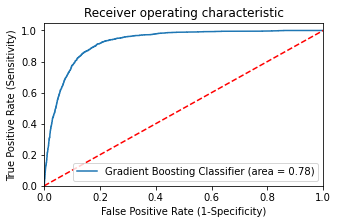

(0.9554, 0.9036, 11289, 688, 619, 968, 0.61, 0.9426, 0.5845, 0, 0.597, 0.7763)

In [113]:
gbc = GradientBoostingClassifier(n_estimators = gbc_bp['n_estimators'], max_depth=gbc_bp['max_depth'], 
                                  learning_rate=gbc_bp['learning_rate'], min_samples_leaf=gbc_bp['min_samples_leaf'],
                                  min_samples_split=gbc_bp['min_samples_split'], random_state=random_state)
model = gbc
model_performance(model,"Gradient Boosting Classifier",stratified_train_X,stratified_train_y, stratified_test_X, stratified_test_y)

In [114]:
#storing data
train_score_gbc, test_score_gbc,tngbc, fpgbc, fngbc, tpgbc  = train_score,test_score,tn, fp, fn, tp
Recall_gbc,Specificity_gbc,Precision_gbc,Acc_gbc,f1_gbc,roc_auc_gbc = Recall,Specificity,Presicion,Accu,f1,logit_roc_auc

#### Model Building - XGBoost Classifier - Hyper Parameters Optimizaton

In [115]:
import xgboost as xgb

In [116]:
classifier = xgb.XGBClassifier()
#
params={
    "learning_rate"    :[0.001,0.01, 0.05, 0.1, 0.5, 0.75],
    "max_depth"        :[1, 3, 5, 7],
    "min_child_weight" :[   1,    3,    5,    7],
    "gamma"            :[0.0,   0.1,  0.2,  0.3, 0.4,1,5,10],
    "colsample_bytree" :[0.3,   0.4,  0.5,0.8,1],
    'n_estimators' :[50, 100, 150, 500,750,1000],
    'subsample':[0.8],
    'reg_alpha':[0.3]
}
#
random_search=RandomizedSearchCV(classifier,param_distributions=params,
                                 n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [117]:
random_search.fit(stratified_train_X, stratified_train_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  1.5min remaining:   29.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.3min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=5, n_jobs=-1,
            

In [118]:
xgb_bp = random_search.best_params_
xgb_bp

{'subsample': 0.8,
 'reg_alpha': 0.3,
 'n_estimators': 750,
 'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.5,
 'gamma': 0.3,
 'colsample_bytree': 0.4}

Feature Importance
             Imp
housing_1   0.07
month_8     0.07
month_4     0.05
campaign    0.05
poutcome    0.05
contact_2   0.04
month_9     0.04
loan_1      0.04
month_5     0.04
duration    0.04
month_1     0.03
job_1       0.02
job_3       0.02
previous    0.02
month_7     0.02
month_0     0.02
contact_0   0.02
job_2       0.02
education_3 0.02
job_6       0.02
month_6     0.02
month_10    0.02
marital_0   0.02
month_3     0.02
job_7       0.01
education_0 0.01
job_11      0.01
day         0.01
job_10      0.01
marital_1   0.01
housing_0   0.01
job_9       0.01
job_0       0.01
job_5       0.01
job_8       0.01
month_2     0.01
age         0.01
contact_1   0.01
default_0   0.01
month_11    0.01
education_1 0.01
loan_0      0.01
job_4       0.01
education_2 0.01
default_1   0.01
marital_2   0.01
balance     0.01
pdays       0.00


Model Train Score : 0.9976
Model Test Score : 0.898




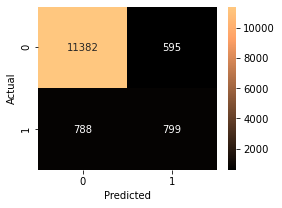





              precision    recall  f1-score   support

           0       0.94      0.95      0.94     11977
           1       0.57      0.50      0.54      1587

    accuracy                           0.90     13564
   macro avg       0.75      0.73      0.74     13564
weighted avg       0.89      0.90      0.90     13564





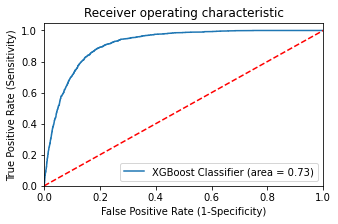

(0.9976,
 0.898,
 11382,
 595,
 788,
 799,
 0.5035,
 0.9503,
 0.5732,
 0,
 0.5361,
 0.7269)

In [119]:
xgbc = xgb.XGBClassifier(min_child_weight= xgb_bp['min_child_weight'],
                          max_depth= xgb_bp['max_depth'],
                          learning_rate= xgb_bp['learning_rate'],
                          gamma= xgb_bp['gamma'],n_estimators=xgb_bp['n_estimators'],
                          subsample=xgb_bp['subsample'],reg_alpha=xgb_bp['reg_alpha'],
                          colsample_bytree= xgb_bp['colsample_bytree'], random_state=random_state)
#
# calling score_confmetrics funtion
model = xgbc
model_performance(model,"XGBoost Classifier",stratified_train_X,stratified_train_y, stratified_test_X, stratified_test_y)

In [120]:
#storing data
train_score_xgbc, test_score_xgbc,tnxgbc, fpxgbc, fnxgbc, tpxgbc  = train_score,test_score,tn, fp, fn, tp
Recall_xgbc,Specificity_xgbc,Precision_xgbc,Acc_xgbc,f1_xgbc,roc_auc_xgbc = Recall,Specificity,Presicion,Accu,f1,logit_roc_auc

#### Model Building - Voting Classifier Classifier - Hyper Parameters Optimizaton

In [121]:
#Import the Voting classifier for Ensemble
from sklearn.ensemble import VotingClassifier

#Multiple model Ensemble
from sklearn import svm
#LR=LogisticRegression(solver='lbfgs', max_iter=400 )
XGB = xgb.XGBClassifier(min_child_weight= xgb_bp['min_child_weight'],
                          max_depth= xgb_bp['max_depth'],
                          learning_rate= xgb_bp['learning_rate'],
                          gamma= xgb_bp['gamma'],n_estimators=xgb_bp['n_estimators'],
                          subsample=xgb_bp['subsample'],reg_alpha=xgb_bp['reg_alpha'],
                          colsample_bytree= xgb_bp['colsample_bytree'], random_state=random_state)
GBC=GradientBoostingClassifier()
DT=DecisionTreeClassifier()
RFC = RandomForestClassifier()



Model Train Score : 0.9999
Model Test Score : 0.8972




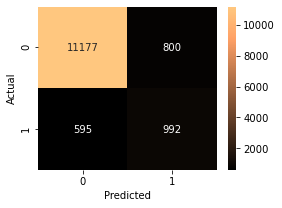





              precision    recall  f1-score   support

           0       0.95      0.93      0.94     11977
           1       0.55      0.63      0.59      1587

    accuracy                           0.90     13564
   macro avg       0.75      0.78      0.76     13564
weighted avg       0.90      0.90      0.90     13564





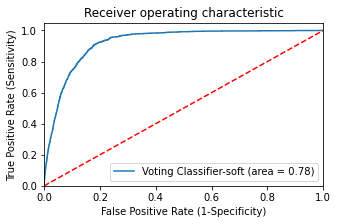

(0.9999,
 0.8972,
 11177,
 800,
 595,
 992,
 0.6251,
 0.9332,
 0.5536,
 0,
 0.5872,
 0.7791)

In [122]:
evc=VotingClassifier(estimators=[('XGB',XGB),('GBC',GBC),('DTR',DT),('RFC',RFC)],voting='soft')
model = evc
model_performance(model,"Voting Classifier-soft",stratified_train_X,stratified_train_y, stratified_test_X, stratified_test_y)

In [123]:
#storing data
train_score_evc, test_score_evc,tnevc, fpevc, fnevc, tpevc  = train_score,test_score,tn, fp, fn, tp
Recall_evc,Specificity_evc,Precision_evc,Acc_evc,f1_evc,roc_auc_evc = Recall,Specificity,Presicion,Accu,f1,logit_roc_auc

#### Store the accuracy results for each model in a dataframe for final comparison

In [124]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Decision Tree- Regularized',
                                    'Bagging','Random Forest - Regularized',
                                    'AdaBoosting','Gradient Boost','Voting Classifier-soft','XGBoost Classifier'], 
                         'Train_set_score':   [train_score_LR,train_score_DT,train_score_DTR,train_score_bgc,train_score_rfc,train_score_abc,train_score_gbc,train_score_evc,train_score_xgbc],
                         'Test_set_score':    [test_score_LR,test_score_DT,test_score_DTR,test_score_bgc,test_score_rfc,test_score_abc,test_score_gbc,test_score_evc,test_score_xgbc],
                         'True Positive': [ tpLR, tpDT, tpDTR,tpbgc , tprfc, tpabc, tpgbc,tpevc,tpxgbc],
                         'True Negative': [ tnLR, tnDT, tnDTR,tnbgc , tnrfc, tnabc, tngbc,tngbc,tnxgbc],
                         'False Positive':[ fpLR, fpDT, fpDTR,fpbgc , fprfc, fpabc, fpgbc,fpgbc,fpxgbc],
                         'False Negative':[ fnLR, fnDT, fnDTR,fnbgc , fnrfc, fnabc, fngbc,fngbc,fnxgbc],
                         'Recall':        [  Recall_LR,  Recall_DT,  Recall_DTR,  Recall_bgc,  Recall_rfc,  Recall_abc,  Recall_gbc,Recall_evc, Recall_xgbc],
                         'Specifity':     [  Specificity_LR,  Specificity_DT,  Specificity_DTR,  Specificity_bgc,  Specificity_rfc,  Specificity_abc,  Specificity_gbc,Specificity_evc,Specificity_xgbc],
                         'Precision':     [  Precision_LR,  Precision_DT,  Precision_DTR,  Precision_bgc,  Precision_rfc,  Precision_abc,  Precision_gbc,Precision_evc,Precision_xgbc],
                         'F1':            [ f1_LR, f1_DT, f1_DTR, f1_bgc, f1_rfc, f1_abc, f1_gbc,f1_evc,f1_xgbc],
                         'Area U_Curve':  [roc_auc_LR  ,  roc_auc_DT,  roc_auc_DTR,  roc_auc_bgc,  roc_auc_rfc,  roc_auc_abc,  roc_auc_gbc,roc_auc_evc,roc_auc_xgbc] })

resultsDf = resultsDf[['Model', 'Train_set_score','Test_set_score','True Positive','True Negative','False Positive',
                       'False Negative','Recall','Specifity','Precision','F1','Area U_Curve']]

In [125]:
resultsDf=resultsDf.sort_values(by=['Area U_Curve'],ascending=False).set_index('Model')
resultsDf

,Train_set_score,Test_set_score,True Positive,True Negative,False Positive,False Negative,Recall,Specifity,Precision,F1,Area U_Curve
Model,,,,,,,,,,,
Random Forest - Regularized,0.96,0.89,1169,10871,1106,418,0.74,0.91,0.51,0.61,0.82
Decision Tree- Regularized,0.83,0.79,1265,9459,2518,322,0.80,0.79,0.33,0.47,0.79
Voting Classifier-soft,1.00,0.90,992,11289,688,619,0.63,0.93,0.55,0.59,0.78
Gradient Boost,0.96,0.90,968,11289,688,619,0.61,0.94,0.58,0.60,0.78
AdaBoosting,0.92,0.89,956,11110,867,631,0.60,0.93,0.52,0.56,0.77
Decision Tree,1.00,0.87,866,10881,1096,721,0.55,0.91,0.44,0.49,0.73
XGBoost Classifier,1.00,0.90,799,11382,595,788,0.50,0.95,0.57,0.54,0.73
Logistic Regression,0.91,0.89,802,11292,685,785,0.51,0.94,0.54,0.52,0.72
Bagging,1.00,0.90,681,11565,412,906,0.43,0.97,0.62,0.51,0.70


#### Observation
- Random Forest and DT regularized classifiers peformed well compared to other models

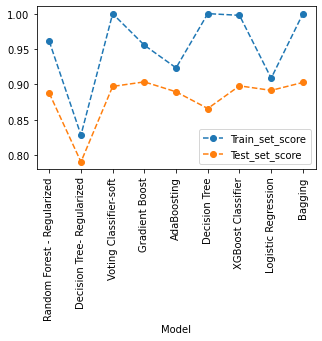

In [126]:
ax=resultsDf[['Train_set_score','Test_set_score']]
ax.plot(figsize=(5,3), rot=90, mark_right=True, linestyle='--', marker='o');

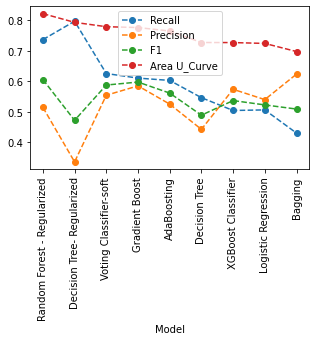

In [127]:
ax =resultsDf[['Recall','Precision','F1', 'Area U_Curve']]
ax.plot(figsize=(5,3), rot=90, mark_right=True, linestyle='--', marker='o');

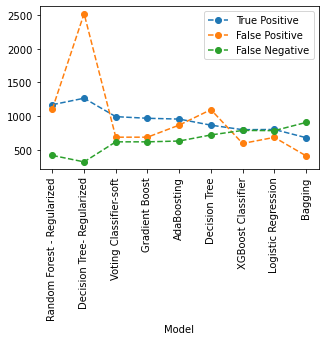

In [128]:
ax = resultsDf[['True Positive','False Positive','False Negative']]
ax.plot(figsize=(5,3), rot=90, mark_right=True, linestyle='--', marker='o');

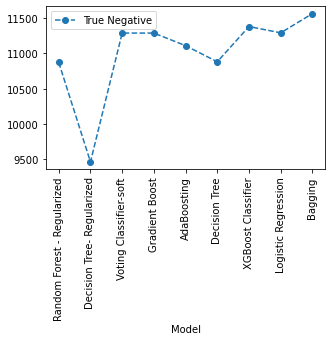

In [129]:
ax = resultsDf[['True Negative']]
ax.plot(figsize=(5,3), rot=90, mark_right=True, linestyle='--', marker='o');

**Model Analysis:**

Finding out customer segments, using data for customers, who subscribed to term deposit. This helps to identify the profile of a customer, who is more likely to acquire the product and develop more targeted marketing campaigns


The classification goal is to predict if the client will subscribe (yes/no) a term deposit.

Most of the ML models works best when the number of classes are in equal proportion since they are designed to maximize accuracy and reduce error. Thus, they do not take into account the class distribution / proportion or balance of classes. In our dataset, the clients subscribing to term deposit (class 'yes' i.e. 1) is 11.7% whereas those about 88.3% of the clients didn't subscribe (class 'no' i.e. 0) to the term deposit.

**Precision would tell us cases where actually the client hadn't subscribed to the term deposit but we predicted it as subscribed.**

**Recall would tell us cases where actually the client had subscribed to the term deposit but we predicted it as didn't subscribe.**


**Oversampling:** which is one of common ways to tackle the issue of imbalanced data. Over-sampling refers to various methods that aim to increase the number of instances from the underrepresented class in the data set. Out of the various methods, we chose Synthetic Minority Over-Sampling Technique (SMOTE). SMOTE’s main advantage compared to traditional random naive over-sampling is that by creating synthetic observations instead of reusing existing observations, classifier is less likely to overfit

**BEST MODEL** 
- Considering the highest Recall - Decision Tree regularized outperformed other models (R - 0.80, P - 0.33)
- COnsidering ROC AUC and f1 score - Random Forest outperformed other models (AUC - 0.82, f1 - 0.61, R - 074, P - 0.51)





**Specific Recommendations to Bank**

**Customers recommendation based on Account Balance**

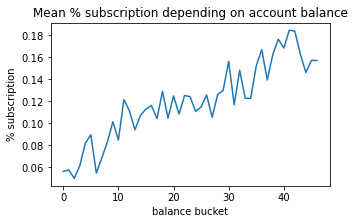

In [142]:
df_new = dfcopy.copy()
df_new['Target']=df_new['Target'].apply(lambda x: 1 if x=='yes' else 0)
df_new['Target']=df_new['Target'].astype('uint8')

#introduce new column 'balance_buckets' to  ''
df_new['balance_buckets'] = pd.qcut(df_new['balance'], 50, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_deposit = df_new.groupby(['balance_buckets'])['Target'].mean()

#plot
plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('Mean % subscription depending on account balance')
plt.xlabel('balance bucket')
plt.ylabel('% subscription')
plt.show()

In [144]:
df_new[df_new['balance_buckets'] == 34]['balance'].min()

1362

**Observation:** From the diagram above we can conclude, that marketing campaigns should concentrate on customers with account balance greater than 1362$.

**Customers recommendation based on Age**

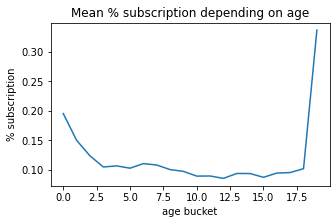

In [145]:
#introduce new column 'age_buckets' to  ''
df_new['age_buckets'] = pd.qcut(df_new['age'], 20, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_age = df_new.groupby(['age_buckets'])['Target'].mean()

#plot
plt.plot(mean_age.index, mean_age.values)
plt.title('Mean % subscription depending on age')
plt.xlabel('age bucket')
plt.ylabel('% subscription')
plt.show()

In [146]:
df_new[df_new['age_buckets'] == 3]['age'].max()

32

In [147]:
df_new[df_new['age_buckets'] == 17]['age'].min()

54

**Observation:** So we see that average subscrition rate tends to be higher for customers below 32 years old or above 54 years old.

**Overall**
- marketing campaigns should concentrate on customers with account balance greater than 1362$.
- Average subscrition rate tends to be higher for customers below 32 years old or above 54 years old

**Business Insights**


1) **Months of Marketing Activity:** We saw that the the month of highest level of marketing activity was the month of May. However, this was the month that potential clients tended to reject term deposits offers. For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of March, September, October and December. (December should be under consideration because it was the month with the lowest marketing activity, there might be a reason why december is the lowest.)

2) **Seasonality:** Potential clients opted to suscribe term deposits during the seasons of fall and winter. The next marketing campaign should focus its activity throghout these seasons.

3) **Campaign Calls:** A policy should be implemented that states that no more than 4 calls should be applied to the same potential client in order to save time and effort in getting new potential clients. Remember, the more we call the same potential client, the likely he or she will decline to open a term deposit. (Number of contacts with the customers really matters. Too many contacts with the customer could make him decline the offer)

4) **Age Category:** The next marketing campaign of the bank should target potential clients in their 20s or younger and 60s or older. It will be great if for the next campaign the bank addressed these two categories and therefore, increase the likelihood of more term deposits suscriptions. (Customers of greater age are more likely to subscribe for the term deposit)

5) **Occupation:** Not surprisingly, potential clients that were students or retired were the most likely to suscribe to a term deposit. Retired individuals, tend to have more term deposits in order to gain some cash through interest payments. Remember, term deposits are short-term loans in which the individual (in this case the retired person) agrees not to withdraw the cash from the bank until a certain date agreed between the individual and the financial institution. After that time the individual gets its capital back and its interest made on the loan. Retired individuals tend to not spend bigly its cash so they are morelikely to put their cash to work by lending it to the financial institution. Students were the other group that used to suscribe term deposits.

6) **House Loans and Balances:** Potential clients in the low balance and no balance category were more likely to have a house loan than people in the average and high balance category. What does it mean to have a house loan? This means that the potential client has financial compromises to pay back its house loan and thus, there is no cash for he or she to suscribe to a term deposit account. However, we see that potential clients in the average and hih balances are less likely to have a house loan and therefore, more likely to open a term deposit. Lastly, the next marketing campaign should focus on individuals of average and high balances in order to increase the likelihood of suscribing to a term deposit. (Customers with greater account balance are more likely to subscribe for the term deposit)


7) **Develop a Questionaire during the Calls:** Since duration of the call is the feature that most positively correlates with whether a potential client will open a term deposit or not, by providing an interesting questionaire for potential clients during the calls the conversation length might increase. Of course, this does not assure us that the potential client will suscribe to a term deposit! Nevertheless, we don't loose anything by implementing a strategy that will increase the level of engagement of the potential client leading to an increase probability of suscribing to a term deposit, and therefore an increase in effectiveness for the next marketing campaign the bank will excecute.


8) **Target individuals with a higher duration:** Target the target group that is above average in duration, there is a highly likelihood that this target group would open a term deposit account. This would allow that the success rate of the next marketing campaign would be highly successful.


By combining all these strategies and simplifying the market audience the next campaign should address, it is likely that the next marketing campaign of the bank will be more effective than the current one

**Additional Material on Feature Elimination**

<b>Using Recursive Feature elemination (RFE) for feature elimination which gave 90% Accuracy and F1 Score</b>

In [156]:
df = pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [157]:
numcols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays','previous']
catcols = ['job', 'marital', 'education', 'default','housing','loan', 'contact',  'month','poutcome' ]

In [158]:
#converting object type to categorical
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer

In [159]:
#converting object type to categorical
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer

In [160]:
#Replacing -1 (not contacted) to zero 
df['pdays'] = df['pdays'].replace(-1,0)

In [161]:
for col in catcols:
    df=pd.concat([df.drop(col,axis=1),pd.get_dummies(df[col],prefix=col,prefix_sep='-')],axis=1)

In [162]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,Target,job-admin.,job-blue-collar,...,month-jun,month-mar,month-may,month-nov,month-oct,month-sep,poutcome-failure,poutcome-other,poutcome-success,poutcome-unknown
0,58,2143,5,261,1,0,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,0,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,0,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,0,0,no,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,0,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1


In [163]:
df['Target']=df['Target'].apply(lambda x: 1 if x=='yes' else 0)
df['Target']=df['Target'].astype('uint8')

In [164]:
X=df.drop('Target',axis=1)
y=df['Target']

In [165]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=random_state)

In [166]:
X_train.shape

(31647, 51)

In [168]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

rfc_rfe = RandomForestClassifier(criterion = rfc_bp['criterion'], n_estimators = rfc_bp['n_estimators'], max_depth=rfc_bp['max_depth'], 
                              min_samples_split=rfc_bp['min_samples_split'], min_samples_leaf=rfc_bp['min_samples_leaf'],random_state=random_state)

rfc_rfe.fit(X_train,y_train)
y_predl=rfc_rfe.predict(X_test)
probs=rfc_rfe.predict_proba(X_test)
prob=probs[:,1]


auc=roc_auc_score(y_test,prob)
print('AUC score is',auc)

AUC score is 0.9295588648437992


In [169]:
print('Classification Report',classification_report(y_test,y_predl))

Classification Report               precision    recall  f1-score   support

           0       0.92      0.98      0.95     11966
           1       0.67      0.34      0.45      1598

    accuracy                           0.90     13564
   macro avg       0.80      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



In [170]:
from sklearn.model_selection import cross_val_score

In [171]:
score=cross_val_score(rfc_rfe,X,y,scoring='accuracy',cv=10)

In [172]:
print('After cross validation,Accuracy is',score.mean()*100)

After cross validation,Accuracy is 75.23140084099158


In [173]:
from sklearn.feature_selection import RFE

rfe=RFE(rfc_rfe)
fit=rfe.fit(X_train,y_train)
selected_feature=fit.support_
print('No. of features %d',fit.n_features_)
print('Selected Features %d',fit.support_)
print('Ranking Features %d',fit.ranking_)

No. of features %d 25
Selected Features %d [ True  True  True  True  True  True  True False False False False False
 False False False False False False False False  True  True False  True
  True False False False  True  True False False  True False  True  True
  True False False False False  True  True  True False  True  True  True
 False  True  True]
Ranking Features %d [ 1  1  1  1  1  1  1 11  7 23 24  3 16 22 19 15  8 21 27 12  1  1 13  1
  1 20 25 26  1  1  4 10  1 18  1  1  1 17  9 14  2  1  1  1  5  1  1  1
  6  1  1]


In [174]:
copy_train_X = X_train.copy()
copy_test_X = X_train.copy()

In [175]:
col_to_drop=[]
for i in range(len(X.columns)-1):
    if selected_feature[i] == False:
        col_to_drop.append(i)

In [176]:
print(list(X_train.columns[col_to_drop]))

['job-admin.', 'job-blue-collar', 'job-entrepreneur', 'job-housemaid', 'job-management', 'job-retired', 'job-self-employed', 'job-services', 'job-student', 'job-technician', 'job-unemployed', 'job-unknown', 'marital-divorced', 'education-primary', 'education-unknown', 'default-no', 'default-yes', 'loan-no', 'loan-yes', 'contact-telephone', 'month-dec', 'month-feb', 'month-jan', 'month-jul', 'month-nov', 'poutcome-other']


In [177]:
X_train.drop(X.iloc[:, col_to_drop], axis=1, inplace = True)
X_test.drop(X.iloc[:, col_to_drop], axis=1, inplace = True)

C:\Users\profe\anaconda3\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [178]:
X_test.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'marital-married', 'marital-single', 'education-secondary',
       'education-tertiary', 'housing-no', 'housing-yes', 'contact-cellular',
       'contact-unknown', 'month-apr', 'month-aug', 'month-jun', 'month-mar',
       'month-may', 'month-oct', 'month-sep', 'poutcome-failure',
       'poutcome-success', 'poutcome-unknown'],
      dtype='object')

In [179]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [180]:
models=[SVC(class_weight='balanced'),
        KNeighborsClassifier(),
        xgbclf,
        RandomForestClassifier(),
        BaggingClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier()
        
        
]
scores=pd.DataFrame(columns=['Model','Accuracy','F1-score','Precision','Recall'])
for model in models:
    classifier=model.fit(X_train,y_train)
    name=str(classifier).rsplit('()',1)
    accuracy = np.average(cross_val_score(classifier, X_test, y_test, scoring= "accuracy"))
    
    f1 = np.average(cross_val_score(classifier, X_test, y_test, scoring= "f1_weighted"))
    
    precision = np.average(cross_val_score(classifier, X_test, y_test, scoring='precision_weighted'))
    
    recall = np.average(cross_val_score(classifier, X_test, y_test, scoring='recall_weighted'))
    
    scores = scores.append({'Model': name,'Accuracy': accuracy,'F1-score': f1,
                             'Precision': precision, 'Recall': recall}, ignore_index=True)

In [181]:
scores.set_index('Model').sort_values('Accuracy',ascending=False)

,Accuracy,F1-score,Precision,Recall
Model,,,,
"[GradientBoostingClassifier, ]",0.90,0.89,0.89,0.90
"[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,\n importance_type='gain', interaction_constraints='',\n learning_rate=0.05, max_delta_step=0, max_depth=13,\n min_child_weight=5, missing=nan, monotone_constraints=', ',\n n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,\n reg_alpha=0.4, reg_lambda=1, scale_pos_weight=1, subsample=0.8,\n tree_method='exact', validate_parameters=1, verbosity=None)]",0.90,0.89,0.89,0.90
"[RandomForestClassifier, ]",0.90,0.89,0.88,0.90
"[AdaBoostClassifier, ]",0.90,0.89,0.89,0.90
"[BaggingClassifier, ]",0.89,0.88,0.88,0.90
"[KNeighborsClassifier, ]",0.88,0.86,0.85,0.88
[SVC(class_weight='balanced')],0.78,0.81,0.87,0.78


#### Observation after applying RFE
- XGBoost, Gradient Boost, RF, AdaBoost classifier are top models with 90% accuracy and 90% Recall

###### *Important Measures:*
- *RECALL* --> Measure of completeness in predecting or proportion of ACTUAL +ve cases that were correctly identified 
    - ~91% of cases, model predicts correctly if potential customer accepts Term deposit. Recall is an important because bank wants to correctly identify out of the potential customers who would accept TDs what fraction did model identify

- *PRECISION* --> Measure of correctiveness in predecting or proportion of +ve cases that were correctly identified 
    - Out of all predicted customers, 89% of time it is correct in predicting potential customers


In [184]:
gbclf = GradientBoostingClassifier().fit(X_train,y_train)

In [185]:
preds = gbclf.predict(X_test)

In [186]:
#For test data show all the rows where the predicted class is not equal to the observed class
test_data = pd.DataFrame()
test_data = X_test.copy()
test_data['Actual'] = y_test.copy()
test_data['predicted'] = preds
test_data[test_data['Actual']!=test_data['predicted']]

,age,balance,day,duration,campaign,pdays,previous,marital-married,marital-single,education-secondary,...,month-jun,month-mar,month-may,month-oct,month-sep,poutcome-failure,poutcome-success,poutcome-unknown,Actual,predicted
34145,33,498,30,301,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0
31271,31,883,5,112,2,106,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
34197,33,5437,4,267,1,91,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
40982,23,431,13,496,2,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0
44123,27,337,9,23,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5627,31,9874,23,1222,5,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
44101,31,2666,8,411,2,148,9,1,0,0,...,0,0,0,0,0,0,0,0,1,0
27698,42,5,21,1067,2,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4916,37,1211,21,795,1,0,0,0,1,1,...,0,0,1,0,0,0,0,1,1,0


In [187]:
test_data[test_data['Actual']!=test_data['predicted']].shape[0]*100/X_test.shape[0]

9.635800648776172

#### Observation after applying RFE
- Only 9.63% of cases were wrongly predicted